In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
plt.style.use("ggplot")

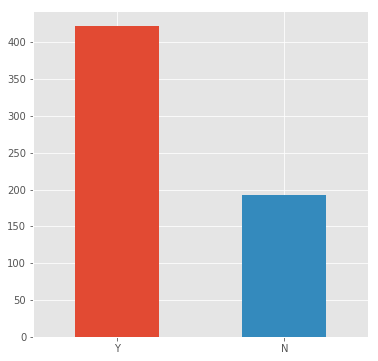

In [8]:
df["Loan_Status"].value_counts().plot(kind="bar", figsize=(6, 6))
plt.xticks(rotation = 0)
plt.show()

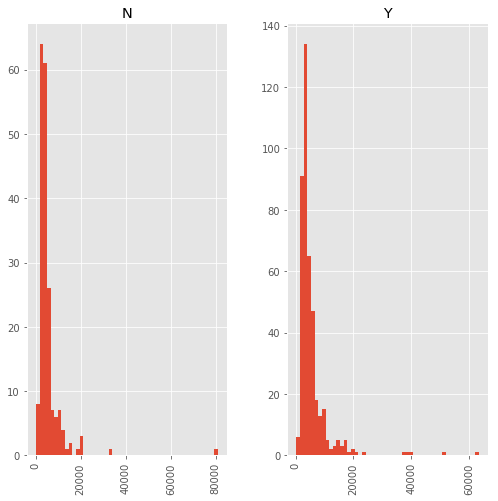

'\n    O salário não influencia tanto na aprovação do empréstimo\n    Para averiguar com rigor, é necessário fazer um teste de hipótese\n    Há bibliotecas prontas no Python para cada tipo de teste. Precisamos saber qual teste é mais adequado (se paramétrico, \n                                                                                                          não paramétrico...)\n'

In [9]:
df[["Loan_Status", "ApplicantIncome"]].hist(by="Loan_Status", bins=50, figsize = (8,8))
plt.show()
'''
    O salário não influencia tanto na aprovação do empréstimo
    Para averiguar com rigor, é necessário fazer um teste de hipótese
    Há bibliotecas prontas no Python para cada tipo de teste. Precisamos saber qual teste é mais adequado (se paramétrico, 
                                                                                                          não paramétrico...)
'''

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.columns = ["Loan_ID", "is_Male", "is_Married", "Dependents", 
              "is_Graduated", "is_Self_Employed", "ApplicantIncome",
              "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", 
              "Credit_History", "Property_Area", "Loan_Status"]

In [12]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
yes_no_map = {"Yes":1, "No":0} #valores NaN viram nulo -> possível deixar "None": np.NaN, mas é opcional
df["is_Married"].map(yes_no_map)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     0.0
14     1.0
15     0.0
16     0.0
17     0.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     0.0
29     0.0
      ... 
584    1.0
585    1.0
586    1.0
587    0.0
588    0.0
589    1.0
590    1.0
591    1.0
592    0.0
593    1.0
594    1.0
595    0.0
596    1.0
597    0.0
598    1.0
599    1.0
600    0.0
601    1.0
602    1.0
603    0.0
604    1.0
605    1.0
606    1.0
607    1.0
608    1.0
609    0.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: is_Married, Length: 614, dtype: float64

In [14]:
df["is_Married"] = df["is_Married"].map(yes_no_map)

In [15]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [17]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [18]:
mapper_status = {'Y':1, 'N':0}

In [19]:
df["Loan_Status"] = df["Loan_Status"].map(mapper_status)

In [20]:
df = df.filter(["Loan_ID", "is_Male", "is_Married", "Dependents", "is_Graduated", "is_Self_Employed", "ApplicantIncome", "CoapplicantIncome", "Total_Income", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"])

In [21]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,5849.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,6091.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,3000.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,4941.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,6000.0,141.0,360.0,1.0,Urban,1


In [22]:
df = pd.get_dummies(df, columns=["Property_Area"]) #separa dados categóricos --> "one-hot encoding"

In [23]:
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,5849.0,NaN,360.0,1.0,1,0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,6091.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,3000.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,4941.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,6000.0,141.0,360.0,1.0,1,0,0,1


In [24]:
df = df.drop("Loan_ID", axis = 1)

In [25]:
df.isnull()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum().sort_values(ascending=False)

Credit_History             50
LoanAmount                 22
is_Married                  3
Property_Area_Urban         0
Property_Area_Semiurban     0
Property_Area_Rural         0
Loan_Status                 0
Loan_Amount_Term            0
Total_Income                0
CoapplicantIncome           0
ApplicantIncome             0
is_Self_Employed            0
is_Graduated                0
Dependents                  0
is_Male                     0
dtype: int64

In [27]:
df = df.loc[df['is_Married'].notnull()] # mantém somente os valores não nulos de is_Married

In [28]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
''' 
    o inplace permite que façamos a alteração diretamente, 
    sem precisar fazer df = df[]...                    
'''

' \n    o inplace permite que façamos a alteração diretamente, \n    sem precisar fazer df = df[]...                    \n'

In [29]:
df["Credit_History"].fillna(1, inplace=True)

In [30]:
df["Credit_History"].value_counts()

1.0    522
0.0     89
Name: Credit_History, dtype: int64

In [31]:
df.corr()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.095791,0.108135,-0.082177,0.010004,0.019381,0.079452,-0.105347,0.031761
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.083776,0.146981,-0.102624,0.009481,0.089280,-0.004520,0.003744,0.000514
Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.125490,0.163692,-0.103619,-0.038736,0.012593,-0.003147,0.004086,-0.001169
is_Graduated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.161765,0.166864,0.073701,0.072670,0.084286,-0.075984,0.038022,0.034363
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.112919,0.115500,-0.033421,-0.000757,-0.002404,0.020858,0.009885,-0.030407
ApplicantIncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.893069,0.566037,-0.044361,-0.018900,-0.005154,0.016269,-0.016002,0.000756
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.343035,0.188151,-0.059135,0.012093,-0.057733,0.003860,-0.025199,0.022269
Total_Income,0.095791,0.083776,0.125490,0.161765,0.112919,0.893069,0.343035,1.000000,0.620553,-0.068741,-0.012396,-0.031027,0.017135,-0.026549,0.010803
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,0.620553,1.000000,0.036135,-0.001631,-0.036782,0.043538,-0.008376,-0.033530
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,-0.068741,0.036135,1.000000,-0.005291,-0.023619,0.035425,0.058878,-0.095081


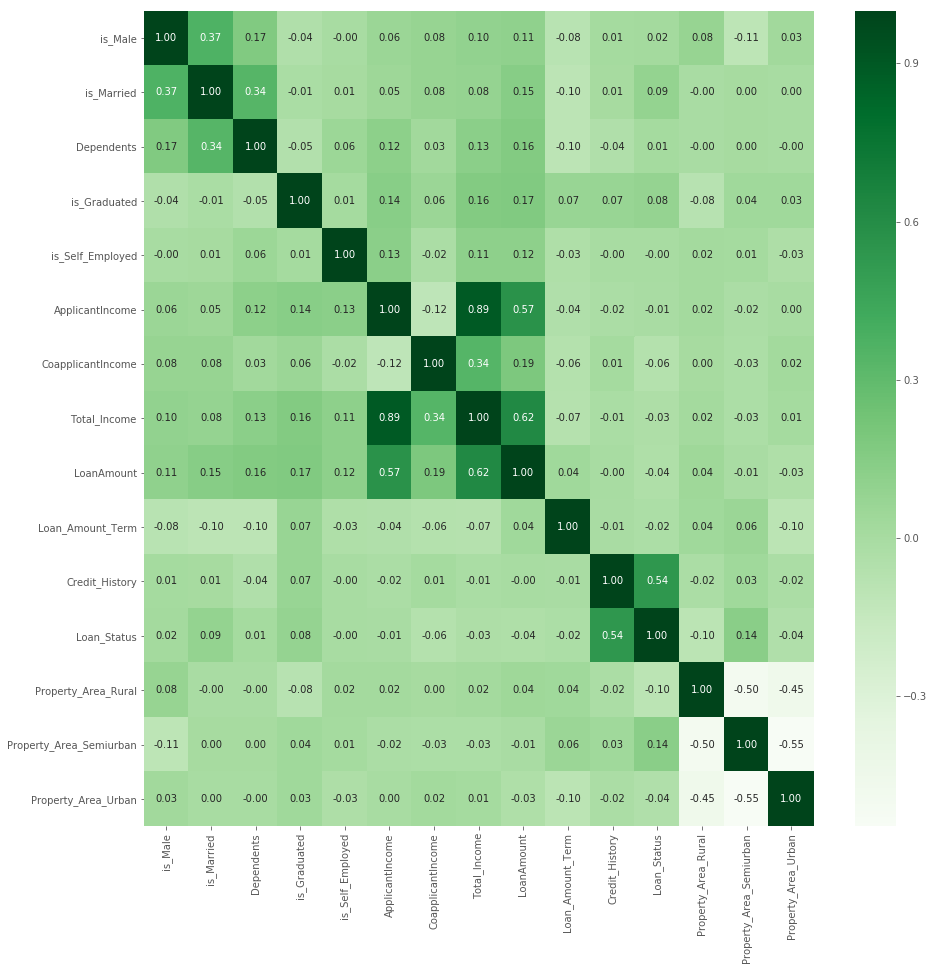

In [32]:
plt.figure(figsize = (15, 15)) 
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap = "Greens")
plt.show() 
#Mapa de correlação!

In [33]:
df["ApplicantIncome"] = np.log(df["ApplicantIncome"])
# --> Importante: dados contínuos costumam precisar serem normalizados (aplicar log é uma boa forma de normalizá-los)

In [34]:
df["Total_Income"] = np.log(df["Total_Income"])

In [35]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,8.674026,0.0,8.674026,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,8.430109,1508.0,8.714568,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,8.006368,0.0,8.006368,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,7.856707,2358.0,8.505323,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,8.699515,0.0,8.699515,141.000000,360.0,1.0,1,0,0,1


In [36]:
X = df.drop("Loan_Status", axis=1)

In [37]:
y = df["Loan_Status"]

In [38]:
df = df.filter(["is_Male", "is_Married", "Dependents", "is_Graduated", "is_Self_Employed", "logApplicantIncome", "CoapplicantIncome", "logTotal_Income", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42) 
#random_state = seed --> usado para pegar sempre os mesmos dados aleatórios

In [40]:
#Teste de regressão logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score do conjunto de treino: {0:.2%}".format(lr.score(X_train, y_train)))
print("Score do conjunto de treino: {0:.2%}".format(lr.score(X_test, y_test)))

'''
    Treino: para aprender -> retorna a % de acertos na amostra que usou para treinar
    Teste: para ver se acertou -> retorna a % de acertos numa amostra de teste
    80% de acurácia dá um modelo bom, de acordo com a indústria
'''

Score do conjunto de treino: 80.44%
Score do conjunto de treino: 82.18%


'\n    Treino: para aprender -> retorna a % de acertos na amostra que usou para treinar\n    Teste: para ver se acertou -> retorna a % de acertos numa amostra de teste\n    80% de acurácia dá um modelo bom, de acordo com a indústria\n'

In [41]:
#Teste de árvore de decisão

dt = DecisionTreeClassifier(max_depth = 4) # -> max_depth mede a quantidade de features para a avaliação
dt.fit(X_train, y_train)
print("Score do conjunto de treino: {0:.2%}".format(dt.score(X_train, y_train)))
print("Score do conjunto de treino: {0:.2%}".format(dt.score(X_test, y_test)))

Score do conjunto de treino: 82.64%
Score do conjunto de treino: 83.17%


In [42]:
#Teste de floresta aleatória

rf = RandomForestClassifier(n_estimators=100, max_depth = 4) # -> max_depth mede a quantidade de features para a avaliação
rf.fit(X_train, y_train)
print("Score do conjunto de treino: {0:.2%}".format(rf.score(X_train, y_train)))
print("Score do conjunto de treino: {0:.2%}".format(rf.score(X_test, y_test)))

Score do conjunto de treino: 81.66%
Score do conjunto de treino: 81.68%


In [43]:
new_df = X_test

In [44]:
new_df["Loan_Status"] = dt.predict(new_df)

c:\users\joaoz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
new_df.to_csv("dados_previstos.csv", index=False)

In [48]:
new_df

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.000000,7.781139,146.369492,360.0,1.0,0,1,0,1
219,0.0,1.0,2.0,1,0.0,8.362409,2383.000000,8.804775,127.000000,360.0,1.0,0,1,0,1
55,1.0,1.0,2.0,1,0.0,7.903966,1167.000000,8.262301,97.000000,360.0,1.0,0,1,0,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.000000,8.648748,128.000000,360.0,1.0,0,0,1,1
266,1.0,1.0,2.0,1,0.0,8.457018,1387.000000,8.715224,150.000000,360.0,1.0,0,1,0,1
156,1.0,1.0,1.0,1,0.0,8.699515,0.000000,8.699515,160.000000,360.0,1.0,1,0,0,1
486,1.0,0.0,2.0,1,0.0,8.173857,0.000000,8.173857,80.000000,360.0,0.0,1,0,0,0
323,0.0,0.0,0.0,1,0.0,8.060224,2985.000000,8.724370,132.000000,360.0,1.0,1,0,0,1
584,1.0,1.0,1.0,1,0.0,7.932721,1917.000000,8.456168,146.000000,360.0,0.0,1,0,0,0
293,0.0,0.0,0.0,1,0.0,8.597297,0.000000,8.597297,143.000000,480.0,0.0,0,0,1,0


In [50]:
import pickle
pickle.dump(dt, open("modelo_treinado.sav", "wb"))

In [52]:
prev = pd.read_csv("dados_previstos.csv")

In [53]:
prev.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1.0,1.0,1.0,1,1.0,7.781139,0.0,7.781139,146.369492,360.0,1.0,0,1,0,1
1,0.0,1.0,2.0,1,0.0,8.362409,2383.0,8.804775,127.000000,360.0,1.0,0,1,0,1
2,1.0,1.0,2.0,1,0.0,7.903966,1167.0,8.262301,97.000000,360.0,1.0,0,1,0,1
3,1.0,1.0,3.0,1,0.0,8.648748,0.0,8.648748,128.000000,360.0,1.0,0,0,1,1
4,1.0,1.0,2.0,1,0.0,8.457018,1387.0,8.715224,150.000000,360.0,1.0,0,1,0,1
